# Preprocessing

In [5]:
import os
import json
import csv
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [8]:
# Specify the directory path
directory_path = 'data/agent/'
map_path = 'data/map/'

agent_list = []
agent_id = 0

# List all files in the directory
for filename in os.listdir(directory_path):
    # Join the file name with the directory path to get the full file path
    full_file_path = os.path.join(directory_path, filename)

    # Check if it's a file and not a directory
    if os.path.isfile(full_file_path):
        # print(filename)
        tokens = filename.split('_')
        mode = tokens[0]
        agent_num = int(tokens[1])
        kill = float(tokens[2])
        time = float(tokens[3])
        idx = int(tokens[4].split(".")[0][-1])
        features = []

        with open(full_file_path, newline='', encoding='utf-8') as csvfile:
            # Create a CSV reader object
            csv_reader = csv.reader(csvfile)
        
            # Read the header (if any)
            header = next(csv_reader)
        
            # Iterate over the rows in the CSV file
            for row in csv_reader:
                parsed = [int(item) for item in row]
                features.append(parsed)

        map_dir = os.path.join(map_path, mode+'_'+str(agent_num)+'_'+str(kill)+'_'+str(time)+'_map.json')
        with open(map_dir, 'r') as f:
            map_data = json.load(f)

        agent = {
            'id': agent_id,
            'mode': mode,
            'agent_num': agent_num,
            'kill': kill,
            'time': time,
            'idx': idx,
            'features': features,
            'map': map_data
        }
        agent_list.append(agent)
        agent_id += 1
        # print(mode, agent_num, kill, time, idx, len(features))

print(len(agent_list))

FileNotFoundError: [Errno 2] No such file or directory: 'data/agent/Norm_4_-1.0_0.03_map.json'

In [61]:
import numpy as np
for i in range(len(agent_list)):
	agent_list[i]['features'] = np.array(agent_list[i]['features'])[:,:4].tolist()
pp.pprint(agent_list[0])
# print(np.array(agent_list[0]['features'])[:,:4])

{   'agent_num': 4,
    'features': [   [1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 1, 0],
                    [0, 0, 1, 0],
                    [0, 1, 0, 0],
                    [1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 1, 1],
                    [0, 1, 0, 0],
                    [0, 1, 0, 0],
                    [1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [1, 0, 0, 0],
                    [1, 0, 0, 0],
                    [1, 0, 0, 0],
                    [1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 1, 0],
                    [1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [1, 0, 0, 0],
                    [1, 0, 0, 1],
                    [0, 0, 1, 0],
                    [0, 0, 1, 0],
                    [1, 0, 0

In [62]:
agent_dict = {}
for agent in agent_list:
    a_id = agent['id']
    features = agent['features']
    agent_dict[a_id] = features
    # del agent['features']
    agent_dict[a_id] = agent
print(len(agent_dict))
print(agent_dict)

72
{0: {'id': 0, 'mode': 'Coop', 'agent_num': 4, 'kill': -1.0, 'time': 0.05, 'idx': 1, 'features': [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [1, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]]}, 1: {'id': 1, 'mode': 'Norm', 'agent_num': 4, 'kill': -1.0, 'time': 0.01, 'idx': 1, 'features': [[0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 

In [63]:
print(len(agent_dict)) # Number of Agents
for key, val in agent_dict.items():
    # print(val)
    # print(val['mode'])
    # print(val['features'])
    print(len(val['features'])) # Number of Actions for an agent
    print(len(val['features'][0])) # Number of feature dimensions for an action
    print(val['features'][0][0]) # A feature value
    break

72
51
4
1


# Torch

In [64]:
# CUDA Availability
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("mps")
print(device)

cpu


In [65]:
agent_count = len(agent_dict)
max_seq_len = -1

tup_list = []
for mover_id, val in agent_dict.items():
    curr_seq_len = len(val['features'])
    if max_seq_len < curr_seq_len:
        max_seq_len = curr_seq_len
    tup = (mover_id, curr_seq_len)
    tup_list.append(tup)

tup_list.sort(key=lambda x: x[1], reverse=True)

In [66]:
print(tup_list[-1])
print(tup_list[0])

(71, 1)
(18, 10000)


In [67]:
import math
import random
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence
from torch import optim
from importlib import reload
import seq2seq as ss
reload(ss)

input_size = 4
output_size = 4
hidden_size = 32
mini_batch = 4
learning_rate=0.01

encoder = ss.EncoderMSE(input_size, hidden_size).to(device)
decoder = ss.DecoderMSE(input_size, hidden_size, output_size).to(device)
encoder_optimizer = optim.AdamW(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.AdamW(decoder.parameters(), lr=learning_rate)

criterion = nn.MSELoss()

In [69]:
packed_inputs = []
packed_inputs_d = []
batch_sizes = []
seq_sums = []

batch_count = math.ceil(agent_count / mini_batch)
for i in range(batch_count):
    batch_list = []
    seq_len = []
    seq_sum = 0
    for j in range(mini_batch):
        curr_idx = i * mini_batch + j
        if curr_idx < agent_count:
            m_id = tup_list[curr_idx][0]
            m_seq = agent_dict[m_id]['features']
            m_tensor = torch.tensor(m_seq, dtype=torch.float, device=device)
            batch_list.append(m_tensor)
            seq_len.append(len(m_seq))
            seq_sum += len(m_seq)
            # print(m_tensor.shape)
    # print(seq_len)
    padded = pad_sequence(batch_list, batch_first=True)
    packed = pack_padded_sequence(padded, seq_len, batch_first=True)
    packed_inputs.append(packed)
    batch_sizes.append(len(seq_len))
    
    d_batch_list = []
    for t in batch_list:
        a = torch.zeros(1, input_size, device=device)
        b = t[:-1, :]
        # print(a.shape)
        # print(b.shape)
        c = torch.cat((a, b), 0)
        d_batch_list.append(c)
    padded = pad_sequence(d_batch_list, batch_first=True)
    packed = pack_padded_sequence(padded, seq_len, batch_first=True)
    packed_inputs_d.append(packed)
    seq_sums.append(seq_sum)
    
print(len(packed_inputs))
print(len(batch_sizes))
print(len(packed_inputs_d))
print(len(seq_sums))

18
18
18
18


In [72]:
import time

losses = []
epoch = 50

start_time = time.time()

# Minibatch iteration
for ep in range(epoch):
    
    indexes = list(range(len(packed_inputs)))
    random.shuffle(indexes)

    counter = 0
    ep_loss = 0
    for idx in indexes:

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        loss = 0

        encoder_input = packed_inputs[idx]
        batch_size = batch_sizes[idx]
        encoder_h0 = torch.zeros(1, batch_size, hidden_size, device=device)

        _, h_n = encoder(encoder_input, encoder_h0)

        decoder_input = packed_inputs_d[idx]
        decoder_h0 = h_n

        decoder_output, _ = decoder(decoder_input, decoder_h0)

        unpacked, unpacked_len = pad_packed_sequence(encoder_input, batch_first=True)

        if decoder_output.shape != unpacked.shape:
            print('Error')
            break

        loss = criterion(decoder_output, unpacked)

#         if counter % 200 == 0:
#             loss_val = loss.item() / seq_sums[idx] * 1000
#             print(counter, loss_val)
#             losses.append(loss_val)
        ep_loss += loss.item()

        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        # counter += 1
    print('ep: {} / loss: {}'.format(ep, ep_loss))
    losses.append(ep_loss)
    
elapsed_time = round(time.time() - start_time, 3)
print('Training Time : {}s'.format(elapsed_time))
    
# print('Final Avg :', sum(losses) / len(losses))
# ss.show_plot(losses)

ep: 0 / loss: 2.6528129279613495
ep: 1 / loss: 2.582000821828842
ep: 2 / loss: 2.5474449545145035
ep: 3 / loss: 2.450610589236021
ep: 4 / loss: 2.4067572746425867
ep: 5 / loss: 2.3438249304890633
ep: 6 / loss: 2.276777296792716
ep: 7 / loss: 2.237085640314035
ep: 8 / loss: 2.2274713192600757
ep: 9 / loss: 2.23090247111395
ep: 10 / loss: 2.263354758732021
ep: 11 / loss: 2.178251700475812
ep: 12 / loss: 2.2006060909479856
ep: 13 / loss: 2.1589770964346826
ep: 14 / loss: 2.0977642764919437
ep: 15 / loss: 2.071878084068885
ep: 16 / loss: 2.070241049397737
ep: 17 / loss: 2.0915505895391107
ep: 18 / loss: 2.092829135945067
ep: 19 / loss: 2.0726048941724002
ep: 20 / loss: 2.0412183231674135
ep: 21 / loss: 1.9987353512551636
ep: 22 / loss: 1.9758160491473973
ep: 23 / loss: 1.9547826256603003
ep: 24 / loss: 1.9879785226657987
ep: 25 / loss: 1.9748050367925316
ep: 26 / loss: 1.9803722326178104
ep: 27 / loss: 1.932205071032513
ep: 28 / loss: 1.8886557042133063
ep: 29 / loss: 1.8738948014215566
ep

In [1]:
encoder_h0 = torch.zeros(1, 1, hidden_size, device=device)
encoder.eval()

m_ids = []
features = []
agent_embed_dict = {}

with torch.no_grad():
    for tup in tup_list:
        m_id = tup[0]
        m_seq = agent_dict[m_id]['features']
        m_tensor = torch.tensor(m_seq, dtype=torch.float, device=device)
        padded = pad_sequence([m_tensor], batch_first=True)
        encoder_input = pack_padded_sequence(padded, [len(m_seq)], batch_first=True)
        _, h_n = encoder(encoder_input, encoder_h0)
        h_n = h_n.view(-1)
        h_n_np = h_n.cpu().numpy()
        
        m_ids.append(m_id)
        features.append(h_n_np)
        # print(m_seq)
        agent_embed_dict[m_id] = {
            'latent': h_n_np.tolist(),
            'umap': None,
            'info': {
                'id': agent_dict[m_id]['id'],
                'mode': agent_dict[m_id]['mode'],
                'num_agent': agent_dict[m_id]['agent_num'],
                'kill': agent_dict[m_id]['kill'],
                'time': agent_dict[m_id]['time'],
                'idx': agent_dict[m_id]['idx']
            }
        }

NameError: name 'torch' is not defined

In [2]:
first_key = list(agent_embed_dict.keys())[0]
first_val = agent_embed_dict[first_key]

pp.pprint(first_val)

NameError: name 'agent_embed_dict' is not defined

In [3]:
print(len(agent_embed_dict))
print(agent_embed_dict)
for key, val in agent_embed_dict.items():
    print(key, len(val['latent']))
    break

NameError: name 'agent_embed_dict' is not defined

# Dimensionality Reduction

In [35]:
# import umap
import umap.umap_ as umap

def run_and_write_umap(nn):
    file_name = 'data/result/agent_umap_result_{}.json'.format(nn)
    print('nn: {} Start'.format(nn))
    
    reducer = umap.UMAP(
        n_neighbors=nn,
        n_epochs= 500
    )
    embedding = reducer.fit_transform(features)
    
    for idx, m_id in enumerate(m_ids):
        pt = embedding[idx]
        agent_embed_dict[m_id]['umap'] = pt.tolist()
        
    new_dict = {}
    new_list = []
    for key, val in agent_embed_dict.items():
        if 'latent' in val:
            del val['latent']
        val['info']['x'] = val['umap'][0]
        val['info']['y'] = val['umap'][1]
        # new_dict[key] = {
        #     'coord': val['umap'],
        #     'info': val['info']
        # }
        new_list.append(val['info'])
        # new_dict[key] = val['info']
    with open(file_name, "w", encoding='UTF-8') as write_file:
        # json.dump(new_dict, write_file, separators=(',', ':'), indent=4, ensure_ascii=False)
        json.dump(new_list, write_file, separators=(',', ':'), indent=4, ensure_ascii=False)
    
    print('nn: {} Done'.format(nn))

In [36]:
nn_list = [2, 5, 10, 20, 50]

for nn in nn_list:
    run_and_write_umap(nn)

nn: 2 Start
nn: 2 Done
nn: 5 Start
nn: 5 Done
nn: 10 Start
nn: 10 Done
nn: 20 Start
nn: 20 Done
nn: 50 Start
nn: 50 Done


In [22]:
file_name = 'data/result/agent_umap_result_5.json'

with open(file_name, "r", encoding='UTF-8') as read_file:
    read_dict = json.load(read_file)
print(len(read_dict))

72


In [27]:
x = []
y = []
# print(read_dict.items())
# for k, v in read_dict.items():
#     x.append(v[0])
#     y.append(v[1])
for v in read_dict:
    x.append(v['x'])
    y.append(v['y'])

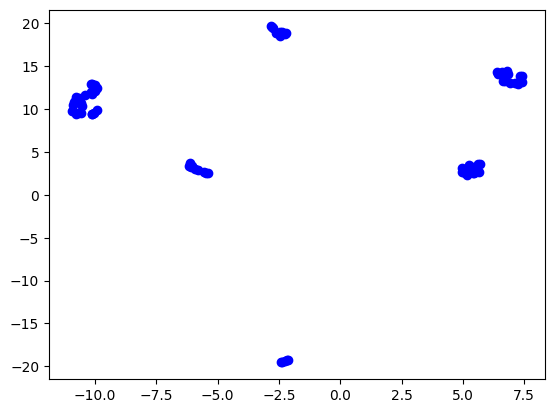

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c ="blue")
plt.show()